## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [ ]:
data_filter = df[
    (df['order_date'].dt.year == 2022) &
    (df['category'] == 'Mobiles & Tablets') &
    (df['is_valid'] == 1)
]

best_products = (
    data_filter.groupby('sku_name')['qty_ordered']
    .sum()
    .reset_index()
    .sort_values(by='qty_ordered')
    .head(5)
)

print('Top 5 proudcts by Mobile & Tablets Category in 2022')
print(best_products)

Top 5 proudcts by Mobile & Tablets Category in 2022
                         sku_name  qty_ordered
23  huawei_Google Nexus 6P-Silver            1
42             samsung_G935F-Gold            1
41            samsung_G935F-Black            1
40             samsung_A720-Black            1
32  iPhone7Plus-Matte Black-128GB            1


In [ ]:
best_products = (
    df[
        (df['order_date'].dt.year == 2022) &
        (df['category'] == 'Mobiles & Tablets') &
        (df['is_valid'] == 1)
    ]
    .groupby('sku_name')['qty_ordered']
    .sum()
    .reset_index()
    .sort_values(by='qty_ordered', ascending=False)
    .head(5)
)

print('Top 5 products by Mobile & Tablets Category in 2022')
print(best_products)

Top 5 products by Mobile & Tablets Category in 2022
                          sku_name  qty_ordered
1               IDROID_BALRX7-Gold         1000
2         IDROID_BALRX7-Jet black            31
3               Infinix Hot 4-Gold           15
43  samsung_Grand Prime Plus-Black           11
34             infinix_Zero 4-Grey           10


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
df_data = df[df['is_valid'] == 1]

df_2021 = df_data[df_data['order_date'].dt.year == 2021]
df_2022 = df_data[df_data['order_date'].dt.year == 2022]

sales_on_2021 = df_2021.groupby('category')['qty_ordered'].sum().reset_index()
sales_on_2022 = df_2022.groupby('category')['qty_ordered'].sum().reset_index()

sales_on_2021.rename(columns={'qty_ordered': 'qty_ordered_2021'}, inplace=True)
sales_on_2022.rename(columns={'qty_ordered': 'qty_ordered_2022'}, inplace=True)

combine_sales = pd.merge(sales_on_2021, sales_on_2022, on='category', how='outer')
combine_sales.fillna(0, inplace=True)
combine_sales['qty_diff'] = combine_sales['qty_ordered_2022'] - combine_sales['qty_ordered_2021']
combine_sales['status'] = combine_sales['qty_diff'].apply(lambda x: 'increase' if x > 0 else 'decrease')

combine_sales = combine_sales.sort_values(by='qty_diff', ascending=True)
combine_sales.head(15)

,category,qty_ordered_2021,qty_ordered_2022,qty_diff,status
10,Others,426,263,-163,decrease
12,Soghaat,759,612,-147,decrease
8,Men Fashion,237,175,-62,decrease
1,Beauty & Grooming,168,153,-15,decrease
0,Appliances,124,148,24,increase
2,Books,171,195,24,increase
5,Health & Sports,173,200,27,increase
3,Computing,109,153,44,increase
11,School & Education,184,237,53,increase
6,Home & Living,193,250,57,increase


## `Jawaban No 2.2`

In [ ]:
# Assuming df_data is your DataFrame and it has the necessary columns: 'category', 'sku_name', 'order_date', 'qty_ordered'

# Filter the DataFrame for the 'Others' category
df_other = df_data[df_data['category'] == 'Others']

# Group by SKU name and year, then sum the quantities ordered
sales_other = df_other.groupby([df_other['sku_name'], df_other['order_date'].dt.year])['qty_ordered'].sum().unstack(fill_value=0)

# Rename the columns to be more descriptive
sales_other.columns = ['qty_ordered_2021', 'qty_ordered_2022']

# Calculate the difference in quantities ordered between 2022 and 2021
sales_other['qty_diff'] = sales_other['qty_ordered_2022'] - sales_other['qty_ordered_2021']

# Find the top 20 products with the smallest (most negative) differences
declining_products = sales_other.nsmallest(20, 'qty_diff')

# Add a rank column
declining_products['Rank'] = range(1, 21)

# Reset the index and select the desired columns
declining_products = declining_products.reset_index()[['Rank', 'sku_name', 'qty_ordered_2021', 'qty_ordered_2022', 'qty_diff']]

# Print the results
print('Top 20 products with declining sales in 2022:')
print(declining_products)

Top 20 products with declining sales in 2022:
    Rank                                           sku_name  qty_ordered_2021  \
0      1                      RB_Dettol Germ Busting Kit-bf               200   
1      2                           Dawlance_MD 10 + DWB 600                23   
2      3                                Telemall_MM-DR-HB-L                23   
3      4             iu_Tickets General Enclosure-Islamabad                20   
4      5                     RS_Rehmat-e-Shereen Mix Mithai                13   
5      6                                    kansai_NeverWet                10   
6      7                        sindbad_Sindbad Gift Card-3                 7   
7      8                                         emart_00-1                 7   
8      9                                   Am-PTV_ATS-004-M                 5   
9     10                                     Vouch 365 2016                 5   
10    11  The Vitamin Company Kojic Acid Whitening Cream...    

## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
# Correct the boolean masks
gross = (df['is_gross'] == 1)  # Fix typo in column name if necessary
valid = (df['is_valid'] == 0)
net = (df['is_net'] == 0)
year = (df['registered_date'].dt.year == 2022)  # Access the year correctly

# Combine the conditions and filter the DataFrame
df_filter = df[gross & valid & net & year]

# Select the desired columns and drop duplicates
df_filter = df_filter[['customer_id', 'registered_date']].drop_duplicates()

# Print the filtered DataFrame
print(df_filter)

     customer_id registered_date
9       C246762L      2022-05-08
19      C693415L      2022-04-12
21      C180595L      2022-04-22
22      C587425L      2022-03-22
23      C612225L      2022-04-24
...          ...             ...
5819    C117258L      2022-08-01
5855    C653797L      2022-04-03
5859    C248585L      2022-07-10
5865    C471304L      2022-05-13
5881    C265450L      2022-02-17

[625 rows x 2 columns]


In [ ]:
#Jalankan kode ini untuk mendownload file
from google.colab import files
[nama variabel file].to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-18-7457bbd37545>, line 3)

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['month_number'] = df['order_date'].dt.month
df.head(5)

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,day,month,month_number
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,Friday,November,11
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,Friday,November,11
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,Thursday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,Sunday,November,11


In [ ]:
# Filter the DataFrame for valid orders, weekends, and the specified date range
weekenddata = df[
    (df['is_valid'] == 1) &
    (df['day'].isin(['Saturday', 'Sunday'])) &
    (df['order_date'] >= '2022-10-01') &
    (df['order_date'] <= '2022-12-31')
]

# Group by 'month_number' and 'month', calculate the mean of 'before_discount', round it, and sort
weekenddata = weekenddata.groupby(by=['month_number', 'month'])['before_discount'].mean()\
                          .round(2)\
                          .sort_values(ascending=False)\
                          .reset_index(name='avg_prof_weekend')

# Display the resulting DataFrame
print(weekenddata)

   month_number     month  avg_prof_weekend
0            10   October         634260.07
1            11  November         607794.21
2            12  December         410599.40


In [ ]:
# Filter the DataFrame for valid orders, weekdays, and the specified date range
weekdaydata = df[
    (df['is_valid'] == 1) &
    (df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
    (df['order_date'] >= '2022-10-01') &
    (df['order_date'] <= '2022-12-31')
]

# Group by 'month_number' and 'month', calculate the mean of 'before_discount', round it, and sort
weekdaydata = weekdaydata.groupby(by=['month_number', 'month'])['before_discount'].mean()\
                          .round(2)\
                          .sort_values(ascending=False)\
                          .reset_index(name='avg_prof_weekdays')

# Display the resulting DataFrame
print(weekdaydata)

   month_number     month  avg_prof_weekdays
0            10   October          874690.27
1            12  December          813574.29
2            11  November          641862.00


In [ ]:
# Merge weekenddata and weekdaydata on the 'month' column
df_compare = weekenddata.merge(weekdaydata, on='month')  # Simplified merge since both use 'month'

# Sort the merged DataFrame by 'month_number' in ascending order
df_compare.sort_values(by='month_number_x', ascending=True, inplace=True)

# Select the relevant columns, including 'month_number'
df_compare = df_compare[['month', 'avg_prof_weekend', 'avg_prof_weekdays']]

# Calculate the difference in average profit between weekends and weekdays
df_compare['diff_value'] = df_compare['avg_prof_weekend'] - df_compare['avg_prof_weekdays']

# Calculate the percentage difference
df_compare['diff_percent'] = round((df_compare['diff_value'] / df_compare['avg_prof_weekdays'])*100, 2)

# Add a 'status' column to indicate whether the difference is an increase or decrease
df_compare['status'] = df_compare['diff_value'].apply(lambda x: 'decrease' if x < 0 else 'increase')

# Display the final DataFrame
print(df_compare)

      month  avg_prof_weekend  avg_prof_weekdays  diff_value  diff_percent  \
0   October         634260.07          874690.27  -240430.20        -27.49   
1  November         607794.21          641862.00   -34067.79         -5.31   
2  December         410599.40          813574.29  -402974.89        -49.53   

     status  
0  decrease  
1  decrease  
2  decrease  


<Axes: xlabel='Category', ylabel='Total'>

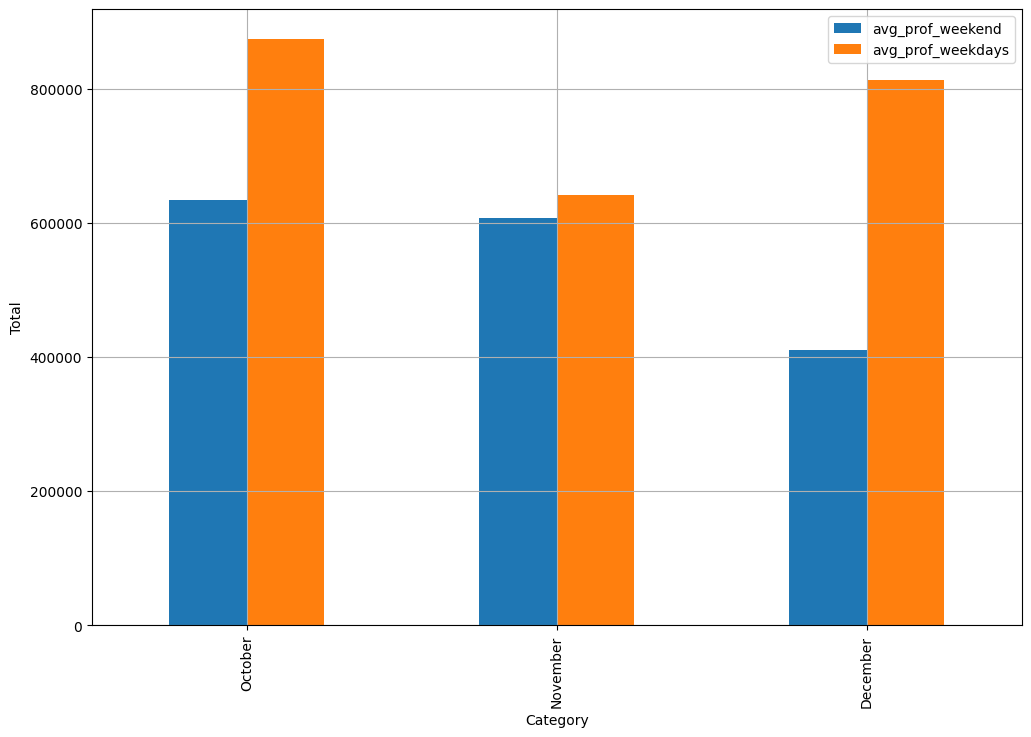

In [ ]:
df_compare.plot(x='month',
                y=['avg_prof_weekend', 'avg_prof_weekdays'],
                kind = 'bar',
                grid = True,
                xlabel = 'Category',
                ylabel = 'Total',
                figsize = (12,8),
                rot = 90,
                table = False)

## `Jawaban No 4.2`

In [ ]:
weekend = df[
    (df['is_valid'] == 1) &
    (df['order_date'].dt.day_name().isin(['Saturday', 'Sunday'])) &
    (df['order_date'].dt.year == 2022) &
    (df['order_date'].dt.month.isin([10, 11, 12]))
]

weekdays = df[
    (df['is_valid'] == 1) &
    (df['order_date'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
    (df['order_date'].dt.year == 2022) &
    (df['order_date'].dt.month.isin([10, 11, 12]))
]

In [ ]:
avg_weekend = round(weekend['before_discount'].mean(), 2)
avg_weekdays = round(weekdays['before_discount'].mean(), 2)

if avg_weekend != 0:
    diff_value = round(avg_weekend - avg_weekdays, 2)
    diff_percent = round((diff_value / avg_weekend) * 100, 2)
else:
    diff_value = 0
    diff_percent = 0

avg_sales_df = pd.DataFrame({
    'Period': ['Total in 3 months'],
    'Weekend': [avg_weekend],
    'Weekdays': [avg_weekdays],
    'Difference Value': [diff_value],
    'Difference Percent': [diff_percent]
})

print(avg_sales_df)

              Period    Weekend   Weekdays  Difference Value  \
0  Total in 3 months  558865.15  770146.01        -211280.86   

   Difference Percent  
0              -37.81  


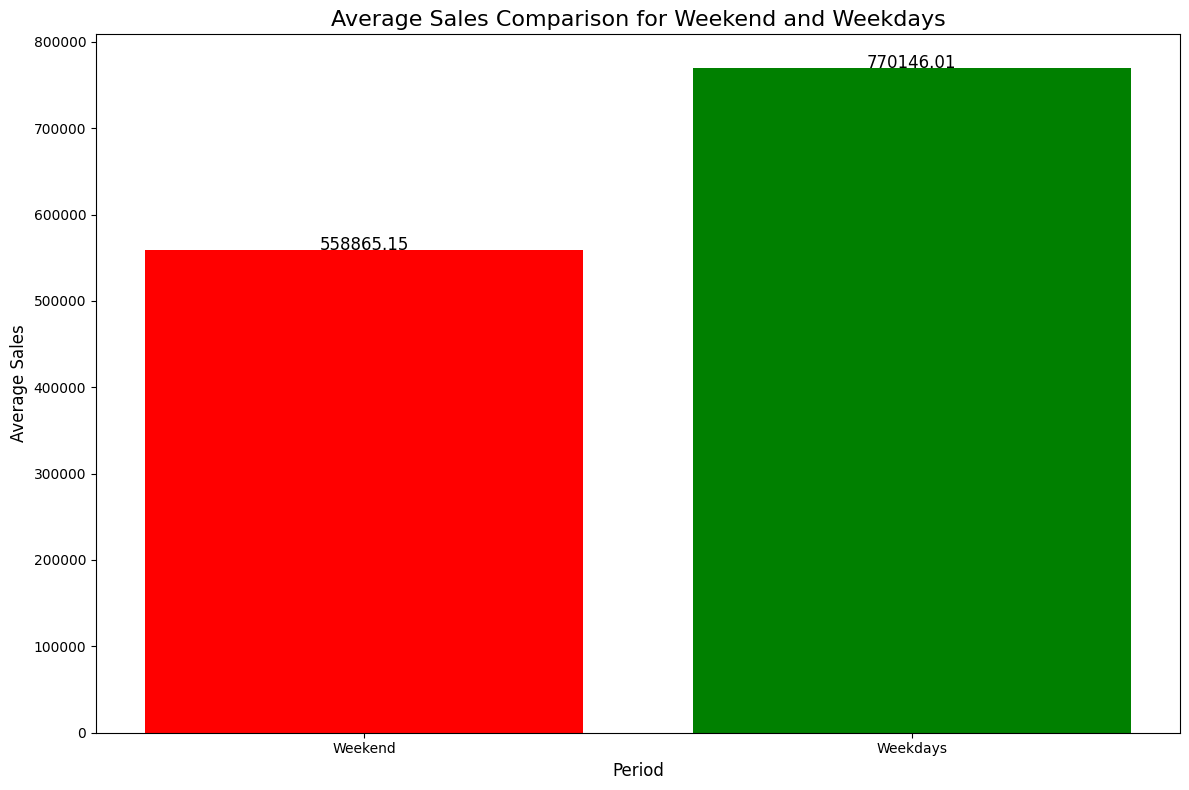

In [ ]:
# Define the categories and their corresponding values
categories = ['Weekend', 'Weekdays']
values = [avg_weekend, avg_weekdays]  # Ensure avg_weekend and avg_weekdays are defined

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(categories, values, color=['red', 'green'], alpha=1.0)
plt.title('Average Sales Comparison for Weekend and Weekdays', fontsize=16)
plt.ylabel('Average Sales', fontsize=12)
plt.xlabel('Period', fontsize=12)

# Add text labels on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.05, f'{value}', ha='center', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()